In [1]:
#Cleaning and formating of a single dataset for CORA - Gulf Stream region 1993-2019 - Feb 2022
import datetime as dt
import glob
import netCDF4 as nc
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
import seaborn as sns

from gsw import sigma0
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

os.getcwd()

'/home1/datahome/epauthen/All_depth'

In [2]:
#Load interpolated profiles
ds = xr.open_dataset("/home/datawork-lops-bluecloud/osnet/data_cora_raw/CORA_all_depth_interp.nc")
ds

<xarray.Dataset>
Dimensions:          (N_PROF: 273708, DEPTH: 114)
Coordinates:
    LON              (N_PROF) float64 ...
    LAT              (N_PROF) float64 ...
  * DEPTH            (DEPTH) int64 0 1 2 3 4 5 ... 3750 3800 3850 3900 3950 4000
    JULD             (N_PROF) datetime64[ns] ...
Dimensions without coordinates: N_PROF
Data variables:
    TEMP_SURF        (N_PROF, DEPTH) float64 ...
    PSAL_SURF        (N_PROF, DEPTH) float64 ...
    TEMP_INTERP      (N_PROF, DEPTH) float64 ...
    PSAL_INTERP      (N_PROF, DEPTH) float64 ...
    DC_REFERENCE     (N_PROF) |S8 ...
    PLATFORM_NUMBER  (N_PROF) |S8 ...

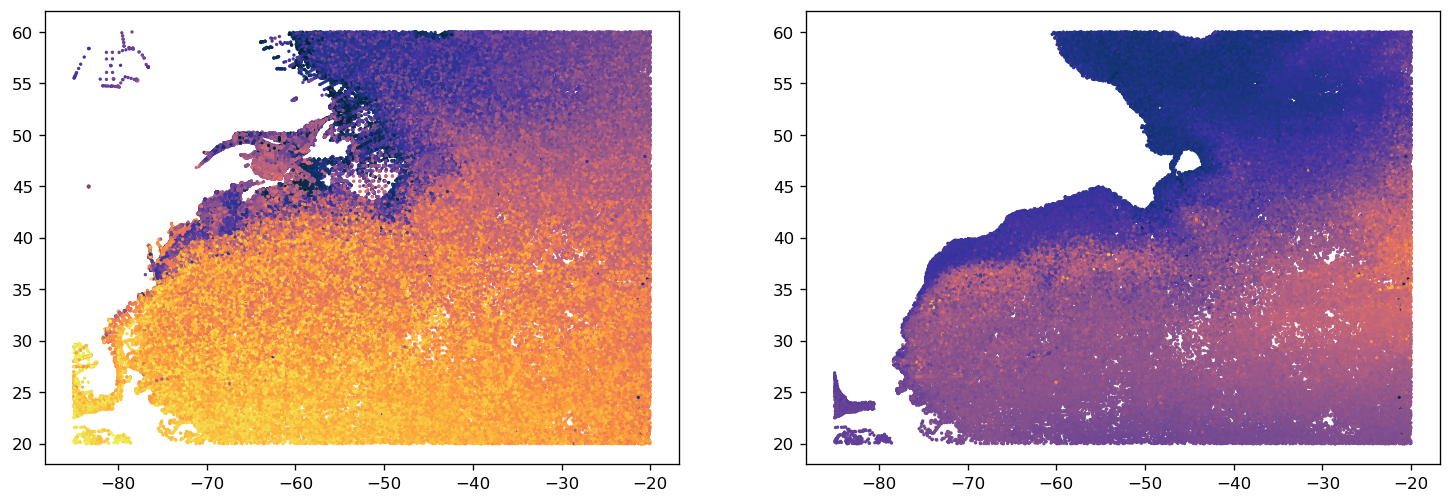

In [3]:
#Map
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=120, facecolor='w', edgecolor='k')
ax[0].scatter(ds.LON,ds.LAT,s = 1,c = ds.TEMP_INTERP.sel(PRES_INTERPOLATED = 0),cmap = cmocean.cm.thermal)
ax[1].scatter(ds.LON,ds.LAT,s = 1,c = ds.TEMP_INTERP.sel(PRES_INTERPOLATED = 1000),cmap = cmocean.cm.thermal)

plt.show()

In [3]:
#Select the period 1993-2019
ds = ds.where(ds.JULD.dt.year<=2019,drop = True)
ds = ds.where(ds.JULD.dt.year>=1993,drop = True)
ds

<xarray.Dataset>
Dimensions:          (N_PROF: 261733, DEPTH: 114)
Coordinates:
    LON              (N_PROF) float64 -30.15 -22.79 -48.43 ... -64.74 -66.1
    LAT              (N_PROF) float64 54.74 52.94 49.0 48.73 ... 41.9 31.8 41.88
  * DEPTH            (DEPTH) int64 0 1 2 3 4 5 ... 3750 3800 3850 3900 3950 4000
    JULD             (N_PROF) datetime64[ns] 2001-08-08T03:46:58 ... 2000-02-...
Dimensions without coordinates: N_PROF
Data variables:
    TEMP_SURF        (N_PROF, DEPTH) float64 nan nan nan nan ... nan nan nan nan
    PSAL_SURF        (N_PROF, DEPTH) float64 nan nan nan nan ... nan nan nan nan
    TEMP_INTERP      (N_PROF, DEPTH) float64 13.92 13.92 13.92 ... nan nan nan
    PSAL_INTERP      (N_PROF, DEPTH) float64 34.82 34.82 34.82 ... nan nan nan
    DC_REFERENCE     (N_PROF) object b'27107' b'3079941' ... b'61687968'
    PLATFORM_NUMBER  (N_PROF) object b'6900161' b'69020' ... b'AGOR' b'CG2683'

In [4]:
#Select zone
#ds = ds.where(ds.LON == slice(-80,-30),ds.LAT == slice(23,50))
ds = ds.where(ds.LON>=-82,drop = True)
ds = ds.where(ds.LON<=-30,drop = True)
ds = ds.where(ds.LAT>=23 ,drop = True)
ds = ds.where(ds.LAT<=50,drop = True)
# and ds.LON<=-30 and ds.LAT>=20 and ds.LAT<=60)
ds.LON.min()


<xarray.DataArray 'LON' ()>
array(-82.)

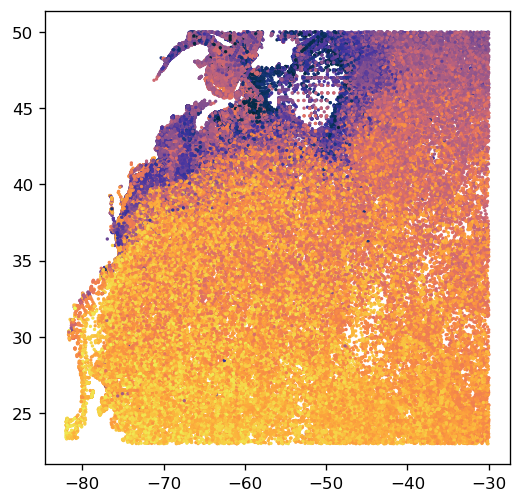

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=120, facecolor='w', edgecolor='k')
ax.scatter(ds.LON,ds.LAT,s = 1,c = ds.TEMP_INTERP.isel(DEPTH = 0),cmap = cmocean.cm.thermal)

In [9]:
ds_clean = ds.where(np.isnan(ds['TEMP_SURF'].isel(DEPTH=14))==False, drop=True)

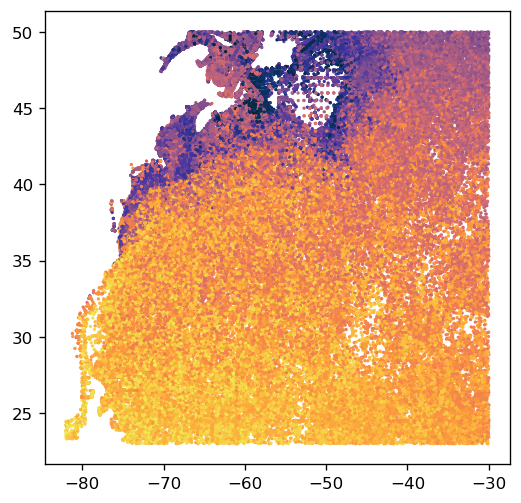

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=120, facecolor='w', edgecolor='k')
ax.scatter(ds_clean.LON,ds_clean.LAT,s = 1,c = ds_clean.TEMP_INTERP.sel(DEPTH = 0),cmap = cmocean.cm.thermal)

# Dataviz where prof start

In [12]:
depth_level = np.zeros(114)
for i, prof in enumerate(ds['DEPTH']):
    depth_level[i] = np.count_nonzero(~np.isnan(ds['TEMP_SURF'].sel(DEPTH=prof)))
depth_level

array([  2730.,  56303.,  88382., 104819., 111966., 137502., 148785.,
       155940., 162321., 163229., 162769., 162833., 160994., 159028.,
       158294., 156094., 153293., 150702., 147675., 144484., 141248.,
       138155., 134536., 131302., 128805., 126498., 122337., 119094.,
       116905., 115102., 112835., 110397., 107635., 104466.,  97955.,
        94376.,  92460.,  90549.,  88694.,  86427.,  85536.,  84728.,
        84174.,  82908.,  81951.,  81666.,  81313.,  81019.,  80719.,
        80546.,  80274.,  79838.,  79149.,  71954.,  69057.,  66843.,
        65618.,  61825.,  61148.,  60551.,  59969.,  59426.,  59054.,
        57217.,  56143.,  55175.,  53711.,  52144.,  50991.,  49661.,
        48388.,  46447.,  39462.,   6337.,   4805.,   4639.,   4601.,
         4553.,   4523.,   4502.,   4482.,   4426.,   4417.,   4365.,
         4349.,   4299.,   4175.,   4154.,   4135.,   4098.,   4077.,
         4046.,   4022.,   3946.,   3878.,   3842.,   3833.,   3809.,
         3750.,   37

Text(0, 0.5, 'depth level')

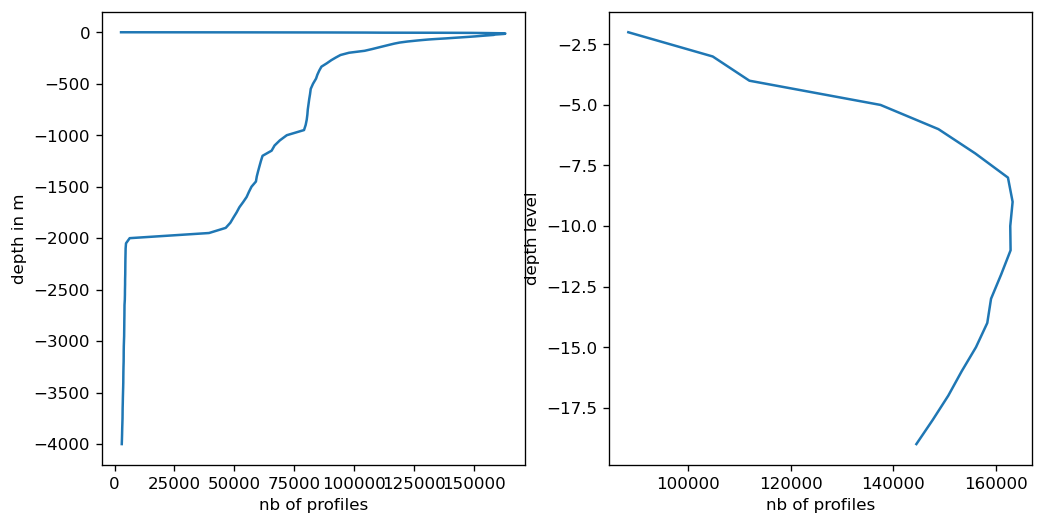

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')

ax[0].plot(depth_level, -ds['DEPTH'])
ax[0].set_xlabel("nb of profiles")
ax[0].set_ylabel("depth in m")

ax[1].plot(depth_level[2:20], -np.arange(114)[2:20])
ax[1].set_xlabel("nb of profiles")
ax[1].set_ylabel("depth level")

In [14]:
ds['DEPTH']

<xarray.DataArray 'DEPTH' (DEPTH: 114)>
array([   0,    1,    2,    3,    4,    5,    6,    8,   10,   12,   14,   16,
         19,   22,   26,   30,   35,   40,   45,   50,   55,   60,   65,   70,
         75,   80,   90,  100,  110,  120,  133,  147,  163,  180,  199,  221,
        245,  271,  301,  334,  371,  412,  450,  500,  550,  600,  650,  700,
        750,  800,  850,  900,  950, 1000, 1050, 1100, 1150, 1200, 1250, 1300,
       1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900,
       1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500,
       2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100,
       3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700,
       3750, 3800, 3850, 3900, 3950, 4000])
Coordinates:
  * DEPTH    (DEPTH) int64 0 1 2 3 4 5 6 ... 3700 3750 3800 3850 3900 3950 4000

In [15]:
start_prof = depth_level - np.roll(depth_level, 1)
start_prof[0] = depth_level[0]

Text(0, 0.5, 'depth level')

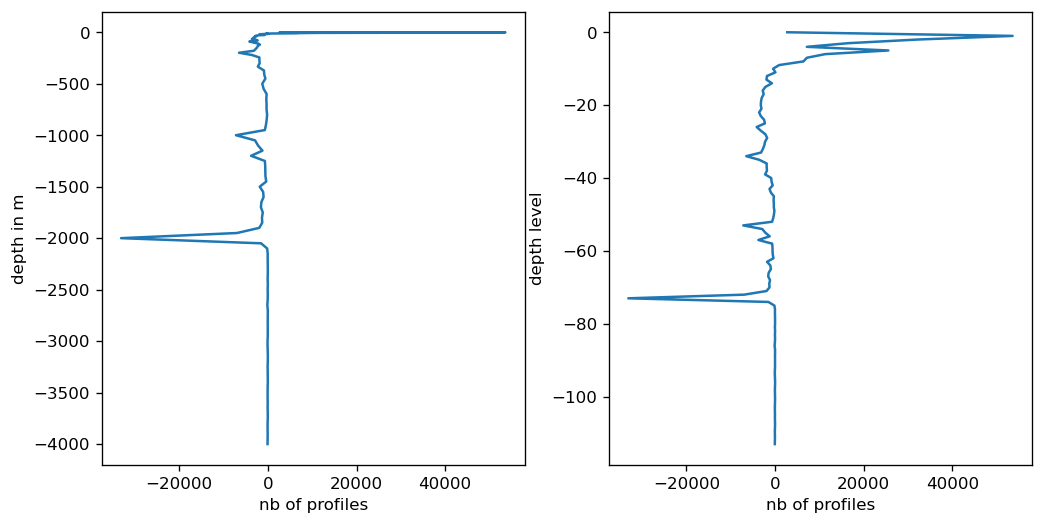

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')

ax[0].plot(start_prof, -ds['DEPTH'])
ax[0].set_xlabel("nb of profiles")
ax[0].set_ylabel("depth in m")

ax[1].plot(start_prof, -np.arange(114))
ax[1].set_xlabel("nb of profiles")
ax[1].set_ylabel("depth level")

In [17]:
#Rename
ds_clean = ds_clean.rename({'LAT': 'latitude', 'LON':'longitude', 'JULD':'time', 'DEPTH': 'depth'})
ds_clean


<xarray.Dataset>
Dimensions:          (N_PROF: 158294, depth: 114)
Coordinates:
    longitude        (N_PROF) float64 -48.43 -47.55 -67.27 ... -64.74 -66.1
    latitude         (N_PROF) float64 49.0 48.73 41.23 40.98 ... 41.9 31.8 41.88
  * depth            (depth) int64 0 1 2 3 4 5 ... 3750 3800 3850 3900 3950 4000
    time             (N_PROF) datetime64[ns] 2001-08-08T06:20:53 ... 2000-02-...
Dimensions without coordinates: N_PROF
Data variables:
    TEMP_SURF        (N_PROF, depth) float64 nan nan nan nan ... nan nan nan nan
    PSAL_SURF        (N_PROF, depth) float64 nan nan nan nan ... nan nan nan nan
    TEMP_INTERP      (N_PROF, depth) float64 12.44 12.44 12.44 ... nan nan nan
    PSAL_INTERP      (N_PROF, depth) float64 33.82 33.82 33.82 ... nan nan nan
    DC_REFERENCE     (N_PROF) object b'25563' b'25590' ... b'61687968'
    PLATFORM_NUMBER  (N_PROF) object b'4900190' b'4900191' ... b'AGOR' b'CG2683'

In [18]:
#Save netcdf
ds_clean.to_netcdf("/home/datawork-lops-bluecloud/osnet/data_cora_raw/CORA_all_depth_clean.nc")